## Data Exploration

In this notebook we will use the interim data set (from previous notebook) to explore the features and target variable

In [ ]:
import warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# suppres warnings
warnings.filterwarnings("ignore")

# Show all rows and columns in the display
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Load the data

In [4]:
interim_df = pd.read_csv("../data/interim/interim_data.csv")

### Examine the data

In [5]:
interim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   logerror                      90275 non-null  float64
 2   transactiondate               90275 non-null  object 
 3   airconditioningtypeid         28781 non-null  float64
 4   architecturalstyletypeid      261 non-null    float64
 5   basementsqft                  43 non-null     float64
 6   bathroomcnt                   90275 non-null  float64
 7   bedroomcnt                    90275 non-null  float64
 8   buildingclasstypeid           16 non-null     float64
 9   buildingqualitytypeid         57364 non-null  float64
 10  calculatedbathnbr             89093 non-null  float64
 11  decktypeid                    658 non-null    float64
 12  finishedfloor1squarefeet      6856 non-null   float64
 13  c

In [6]:
interim_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


### Identify numerical and categorical variabels

In [7]:
id_col = ["parcelid"]

In [8]:
cat_cols = [
    "airconditioningtypeid",
    "architecturalstyletypeid",
    "buildingclasstypeid",
    "buildingqualitytypeid",
    "decktypeid",
    "fips",
    "fireplaceflag",
    "hashottuborspa",
    "heatingorsystemtypeid",
    "pooltypeid10",
    "pooltypeid2",
    "pooltypeid7",
    "propertycountylandusecode",
    "propertylandusetypeid",
    "propertyzoningdesc",
    "rawcensustractandblock",
    "censustractandblock",
    "regionidcounty",
    "regionidcity",
    "regionidzip",
    "regionidneighborhood",
    "storytypeid",
    "typeconstructiontypeid",
    "yearbuilt",
    "assessmentyear",
    "taxdelinquencyflag",
    "taxdelinquencyyear",
]

In [9]:
id_cat_cols = id_col + cat_cols

In [10]:
len(id_cat_cols)  # 28 categorical columns

28

In [11]:
# convert all categorical variables to categorical type
for col in id_col + cat_cols:
    interim_df[col] = interim_df[col].astype("object")

In [12]:
interim_df["transactiondate"] = pd.to_datetime(interim_df["transactiondate"])

In [13]:
interim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   parcelid                      90275 non-null  object        
 1   logerror                      90275 non-null  float64       
 2   transactiondate               90275 non-null  datetime64[ns]
 3   airconditioningtypeid         28781 non-null  object        
 4   architecturalstyletypeid      261 non-null    object        
 5   basementsqft                  43 non-null     float64       
 6   bathroomcnt                   90275 non-null  float64       
 7   bedroomcnt                    90275 non-null  float64       
 8   buildingclasstypeid           16 non-null     object        
 9   buildingqualitytypeid         57364 non-null  object        
 10  calculatedbathnbr             89093 non-null  float64       
 11  decktypeid                  

Now all the features are of correct data types

### Summarize numerical and categorical variables and Check for null and unique values

In [14]:
interim_df.describe(include=[np.number])

,logerror,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
count,90275.000000,43.000000,90275.000000,90275.000000,89093.000000,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,9607.000000,89093.000000,29937.000000,29937.000000,9.027500e+04,9.027500e+04,8.012500e+04,17901.0,969.000000,90275.000000,12009.000000,58353.000000,2646.000000,95.000000,20570.000000,8.989500e+04,9.027400e+04,9.027400e+04,90269.000000
mean,0.011457,713.581395,2.279474,3.031869,2.309216,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,1355.546674,2302.546318,1.187884,2.241231,1.812005,345.521228,3.400541e+07,-1.181989e+08,2.911016e+04,1.0,519.827657,1.478516,1.008743,1.110414,310.142101,311.694737,1.440739,1.800934e+05,4.576726e+05,2.783353e+05,5983.975927
std,0.161079,437.434198,1.004271,1.156436,0.976172,652.399026,928.162393,909.941166,110.108211,1068.207182,673.703488,1346.255242,0.484173,0.963142,0.608761,267.015918,2.649654e+05,3.606032e+05,1.217213e+05,0.0,155.054210,2.819627,0.100830,0.797235,216.721869,346.354850,0.544498,2.091299e+05,5.548844e+05,4.004955e+05,6838.876956
min,-4.605000,100.000000,0.000000,0.000000,1.000000,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,1.000000,1.000000,0.000000,0.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,0.000000,1.000000,1.000000,25.000000,18.000000,1.000000,1.000000e+02,2.200000e+01,2.200000e+01,49.080000
25%,-0.025300,407.500000,2.000000,2.000000,2.000000,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,1.000000,2.000000,2.000000,0.000000,3.381154e+07,-1.184117e+08,5.703000e+03,1.0,420.000000,0.000000,1.000000,1.000000,180.000000,100.000000,1.000000,8.124500e+04,1.990232e+05,8.222800e+04,2872.830000
50%,0.006000,616.000000,2.000000,3.000000,2.000000,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,1.000000,2.000000,2.000000,433.000000,3.402150e+07,-1.181734e+08,7.200000e+03,1.0,500.000000,0.000000,1.000000,1.000000,259.500000,159.000000,1.000000,1.320000e+05,3.428720e+05,1.929700e+05,4542.750000
75%,0.039200,872.000000,3.000000,4.000000,3.000000,1614.000000,2095.000000,2056.000000,1440.000000,2862.000000,1619.000000,3431.000000,1.000000,3.000000,2.000000,484.000000,3.417274e+07,-1.179216e+08,1.168600e+04,1.0,600.000000,0.000000,1.000000,1.000000,384.000000,361.000000,2.000000,2.105345e+05,5.405890e+05,3.454195e+05,6901.090000
max,4.737000,1555.000000,20.000000,16.000000,20.000000,7625.000000,22741.000000,20013.000000,1584.000000,22741.000000,8352.000000,7224.000000,5.000000,20.000000,24.000000,7339.000000,3.481601e+07,-1.175549e+08,6.971010e+06,1.0,1750.000000,18.000000,4.000000,143.000000,2678.000000,1366.000000,4.000000,9.948100e+06,2.775000e+07,2.450000e+07,321936.090000


#### lot of null values in these features


basementsqft - only 43 not null values \
finishedfloor1squarefeet - only 6856 not null values \
finishedsquarefeet13 - only 33 not null values \
finishedsquarefeet15 - only 3564 not null values \
finishedsquarefeet50 - only 6856 not null values \
finishedsquarefeet6 - only 421 not null values \
poolsizesum - only 969 not null values \
yardbuildingsqft17 - only 2646 not null values \
yardbuildingsqft26 - only 95 not null values



In [15]:
interim_df.describe(include=["object"])

,parcelid,airconditioningtypeid,architecturalstyletypeid,buildingclasstypeid,buildingqualitytypeid,decktypeid,fips,hashottuborspa,heatingorsystemtypeid,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,storytypeid,typeconstructiontypeid,yearbuilt,fireplaceflag,assessmentyear,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
count,90275,28781.0,261.0,16.0,57364.0,658.0,90275.0,2365,56080.0,1161.0,1204.0,16697.0,90274,90275.0,58313,9.027500e+04,88472.0,90275.0,36012.0,90240.0,43.0,299.0,89519.0,222,90275.0,1783,1783.0,8.967000e+04
unique,90150,6.0,6.0,1.0,8.0,1.0,3.0,1,12.0,1.0,1.0,1.0,77,14.0,1996,4.264300e+04,177.0,3.0,494.0,388.0,1.0,3.0,130.0,1,1.0,1,11.0,4.239800e+04
top,11842707,1.0,7.0,4.0,7.0,66.0,6037.0,True,2.0,1.0,1.0,1.0,0100,261.0,LAR1,6.037920e+07,12447.0,3101.0,118208.0,97319.0,7.0,6.0,1955.0,True,2015.0,Y,14.0,6.037920e+13
freq,3,26668.0,221.0,16.0,29310.0,658.0,58574.0,2365,38303.0,1161.0,1204.0,16697.0,30846,60637.0,7678,8.400000e+01,20559.0,58574.0,773.0,912.0,43.0,296.0,2261.0,222,90275.0,1783,628.0,6.200000e+01


parcelid  - only 90150 out of 90275 are unique. Some parcelid's are repeated, but parcelid's are supposed to be unique..

#### lot of null values in these features

buildingclasstypeid - only 16 are not null. lot of them are empty. And only 1 unique value. \
decktypeid - only 658 are not null. lot of them are empty. And only 1 unique value. \
hashottuborspa - only 2365 are notnull. lot of them are empty. And only 1 unique value. \
pooltypeid10 - only 2365 are notnull. lot of them are empty. And only 1 unique value. \
pooltypeid2 - only 2365 are notnull. lot of them are empty. And only 1 unique value. \
storytypeid - only 43 are notnull. lot of them are empty. And only 1 unique value. \
typeconstructiontypeid - only 299 are notnull. lot of them are empty. \
fireplaceflag - only 299 are notnull. lot of them are empty. And only 1 unique value. \
assessmentyear - only 1 unique value. In this case 2015. \
taxdelinquencyflag - only 1783 are not null. lot of them are empty. And only 1 unique value. \
taxdelinquencyyear - only 1783 are not null. lot of them are empty. 


#### lot of cardinality in these features

propertyzoningdesc - 1996 unique groups \
rawcensustractandblock - 42643 unique groups \
regionidcity - 177 unique groups \
regionidneighborhood - 494 unique groups \
regionidzip - 388 unique groups \
censustractandblock - 42398 unique groups

### Check for unique values

Another way to check the cardinality of the categorical features

In [16]:
interim_df.select_dtypes(include=["object"]).nunique().sort_values(
    ascending=False
).head(20)

parcelid                     90150
rawcensustractandblock       42643
censustractandblock          42398
propertyzoningdesc            1996
regionidneighborhood           494
regionidzip                    388
regionidcity                   177
yearbuilt                      130
propertycountylandusecode       77
propertylandusetypeid           14
heatingorsystemtypeid           12
taxdelinquencyyear              11
buildingqualitytypeid            8
airconditioningtypeid            6
architecturalstyletypeid         6
fips                             3
regionidcounty                   3
typeconstructiontypeid           3
pooltypeid2                      1
pooltypeid10                     1
dtype: int64

### Check for null values

Another way to check the null values of all features

In [17]:
interim_df.isnull().sum().sort_values(ascending=False).head(30)

buildingclasstypeid         90259
finishedsquarefeet13        90242
basementsqft                90232
storytypeid                 90232
yardbuildingsqft26          90180
fireplaceflag               90053
architecturalstyletypeid    90014
typeconstructiontypeid      89976
finishedsquarefeet6         89854
decktypeid                  89617
poolsizesum                 89306
pooltypeid10                89114
pooltypeid2                 89071
taxdelinquencyyear          88492
taxdelinquencyflag          88492
hashottuborspa              87910
yardbuildingsqft17          87629
finishedsquarefeet15        86711
finishedsquarefeet50        83419
finishedfloor1squarefeet    83419
fireplacecnt                80668
threequarterbathnbr         78266
pooltypeid7                 73578
poolcnt                     72374
numberofstories             69705
airconditioningtypeid       61494
garagecarcnt                60338
garagetotalsqft             60338
regionidneighborhood        54263
heatingorsyste

### Explore transaction date

In [18]:
interim_df["transactiondate"].describe(datetime_is_numeric=True)

count                            90275
mean     2016-06-11 18:30:39.260038912
min                2016-01-01 00:00:00
25%                2016-04-05 00:00:00
50%                2016-06-14 00:00:00
75%                2016-08-19 00:00:00
max                2016-12-30 00:00:00
Name: transactiondate, dtype: object

<AxesSubplot:>

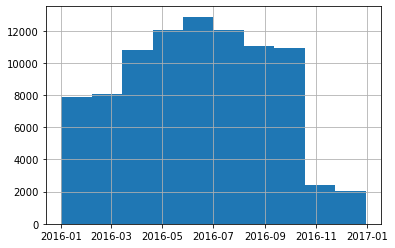

In [19]:
interim_df["transactiondate"].hist()

The data ranges from 2016-01-01 to 2016-12-30

### Check for duplicates 

In [20]:
interim_df.duplicated().sum()  # all rows are unique

0

In [21]:
interim_df["parcelid"].describe()

count        90275
unique       90150
top       11842707
freq             3
Name: parcelid, dtype: int64

Total of 90275 parcel id's out of which 90150 are unique. Hence 125 parcel id's are duplicated. They are sold more than once.  We don't want to consider the same property multiple times and hence will consider only the unique properties. 

We will remove the duplicated properties randomly as the duplicated properties are very less (125 out of 90275)

In [22]:
# get the unique parcel and duplicated parcel

parcel_count = interim_df.groupby(["parcelid"]).size()

In [23]:
parcel_count.sort_values(ascending=False).head(10)

parcelid
11842707    3
11419032    2
11554091    2
11747818    2
11526663    2
12715657    2
13969515    2
12276495    2
10883535    2
14444102    2
dtype: int64

In [24]:
unique_parcel = interim_df[
    interim_df["parcelid"].isin(parcel_count[parcel_count == 1].index)
]
duplicated_parcel = interim_df[
    interim_df["parcelid"].isin(parcel_count[parcel_count > 1].index)
]
print(len(unique_parcel))
print(len(duplicated_parcel))

90026
249


In [25]:
duplicated_parcel_unique = (
    duplicated_parcel.sample(frac=1, random_state=42).groupby(["parcelid"]).head(1)
)
len(duplicated_parcel_unique)

124

In [26]:
unique_interim_df = pd.concat([unique_parcel, duplicated_parcel_unique], axis=0)
len(unique_interim_df)

90150

In [27]:
unique_interim_df.to_csv("../data/interim/unique_interim_data.csv", index=False)

### Explore target variable

In [28]:
unique_interim_df["logerror"].describe()

count    90150.000000
mean         0.011473
std          0.160955
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

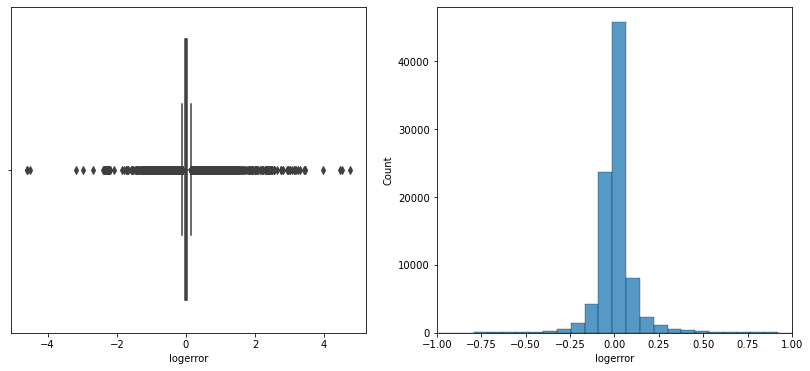

In [29]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="logerror", data=unique_interim_df)
plt.subplot(1, 2, 2)
sns.histplot(x="logerror", data=unique_interim_df, bins=120)
plt.xlim(-1, 1)
plt.show()

After plotting the logerror on logscale and it looks like normal distribution

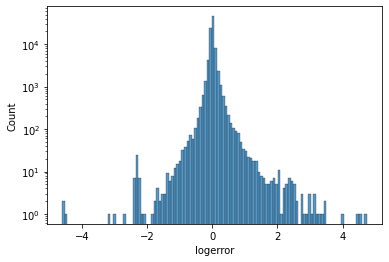

In [30]:
sns.histplot(x="logerror", data=unique_interim_df, bins=120)
plt.yscale("log")
plt.show()